# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset: https://www.kaggle.com/datasets/travistyler/dnd-5e-monster-manual-stats?select=cleaned_monsters_basic.csv

Import the necessary libraries and create your dataframe(s).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing the original csv file before cleaning
monsters_original = pd.read_csv('cleaned_monsters_basic.csv')
pd.set_option('display.max_columns', None)

monsters_df = pd.DataFrame(monsters_original)

monsters_df['cr'] = monsters_df['cr'].replace({'1/4': 0.25, '1/8': 0.125, '1/2': 0.5}).astype(float)


monsters_df.head()

,Unnamed: 0,name,size,monster_type,alignment,ac,hp,strength,str_mod,dex,dex_mod,con,con_mod,intel,int_mod,wis,wis_mod,cha,cha_mod,senses,languages,cr,str_save,dex_save,con_save,int_save,wis_save,cha_save,speed,swim,fly,climb,burrow,number_legendary_actions,history,perception,stealth,persuasion,insight,deception,arcana,religion,acrobatics,athletics,intimidation
0,0,Aboleth,Large,Aberration,lawful evil,17,135,21,5,9,-1,15,2,18,4,15,2,18,4,"Darkvision 120 Ft., passive Perception 20","Deep Speech, Telepathy 120 Ft.",10.00,0,0,6,8,6,0,10,40,0,0,0,3,12,10,0,0,0,0,0,0,0,0,0
1,1,Acolyte,Medium,Humanoid (any race),any alignment,10,9,10,0,10,0,10,0,10,0,14,2,11,0,passive Perception 12,Any One Language (Usually Common),0.25,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,Adult Black Dragon,Huge,Dragon,chaotic evil,19,195,23,6,14,2,21,5,14,2,13,1,17,3,"Blindsight 60 Ft., Darkvision 120 Ft., passive...","Common, Draconic",14.00,0,7,10,0,6,8,40,40,80,0,0,3,0,11,7,0,0,0,0,0,0,0,0
3,3,Adult Blue Dragon,Huge,Dragon,lawful evil,19,225,25,7,10,0,23,6,16,3,15,2,19,4,"Blindsight 60 Ft., Darkvision 120 Ft., passive...","Common, Draconic",16.00,0,5,11,0,7,9,40,0,80,0,30,3,0,12,5,0,0,0,0,0,0,0,0
4,4,Adult Brass Dragon,Huge,Dragon,chaotic good,18,172,23,6,10,0,21,5,14,2,13,1,17,3,"Blindsight 60 Ft., Darkvision 120 Ft., passive...","Common, Draconic",13.00,0,5,10,0,6,8,40,0,80,0,40,3,7,11,5,8,0,0,0,0,0,0,0


# Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [2]:
#looking for missing data that is above 0%
for col in monsters_df.columns:
    pct_missing = np.mean(monsters_df[col].isnull())
    if pct_missing > 0:
        print(f'{col} - {round(pct_missing*100)}%')

senses - 18%
languages - 40%


In [3]:
#Filling null values in languages with 'no language'
monsters_df['languages'].fillna('no language', inplace = True)

monsters_df['languages'].value_counts()

no language                                                                                    128
Common, Draconic                                                                                32
Draconic                                                                                        12
Any One Language (Usually Common)                                                               12
Infernal, Telepathy 120 Ft.                                                                      8
                                                                                              ... 
Understands Abyssal, Celestial, Infernal, And Primordial But Can't Speak, Telepathy 120 Ft.      1
Understands Infernal But Can't Speak                                                             1
Common Plus Up To Five Other Languages                                                           1
Any Four Languages                                                                               1
Goblin, Wo

In [5]:
#Filling null values in senses with 'standard senses'
monsters_df['senses'].fillna('standard senses', inplace = True)

monsters_df['senses'].value_counts()

standard senses                                                       57
passive Perception 13                                                 24
Darkvision 60 Ft., passive Perception 10                              19
Darkvision 60 Ft., passive Perception 14                              13
passive Perception 14                                                 11
                                                                      ..
Blindsight 120 Ft., passive Perception 13                              1
Truesight 120 Ft., passive Perception 19                               1
Darkvision 60 Ft., passive Perception 17                               1
Blindsight 60 Ft. (Blind Beyond This Radius), passive Perception 7     1
Darkvision 120 Ft., passive Perception 20                              1
Name: senses, Length: 84, dtype: int64

**OBSERVATIONS**

I chose to fill the null language cells with "no language" and null senses with "standard senses" because those make the most sense in this context. 

# Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [6]:
#Numeric columns (floats and int)
types={}
for col in monsters_df.columns:
    if monsters_df[col].dtype != object:
        print(col)


Unnamed: 0
ac
hp
strength
str_mod
dex
dex_mod
con
con_mod
intel
int_mod
wis
wis_mod
cha
cha_mod
cr
str_save
dex_save
con_save
int_save
wis_save
cha_save
speed
swim
fly
climb
burrow
number_legendary_actions
history
perception
stealth
persuasion
insight
deception
arcana
religion
acrobatics
athletics
intimidation


## Irregular data - Ability Scores

              str         dex         con       intel         wis         cha
count  324.000000  324.000000  324.000000  324.000000  324.000000  324.000000
mean    15.117284   12.651235   15.067901    7.799383   11.688272    9.746914
std      6.739180    3.210658    4.495097    5.715104    2.925026    5.828096
min      1.000000    1.000000    8.000000    1.000000    3.000000    1.000000
25%     11.000000   10.000000   12.000000    2.000000   10.000000    5.000000
50%     16.000000   13.000000   14.000000    7.000000   12.000000    8.000000
75%     19.000000   15.000000   18.000000   12.000000   13.000000   14.000000
max     30.000000   28.000000   30.000000   25.000000   25.000000   30.000000


[Text(0.5, 0, 'Ability Scores')]

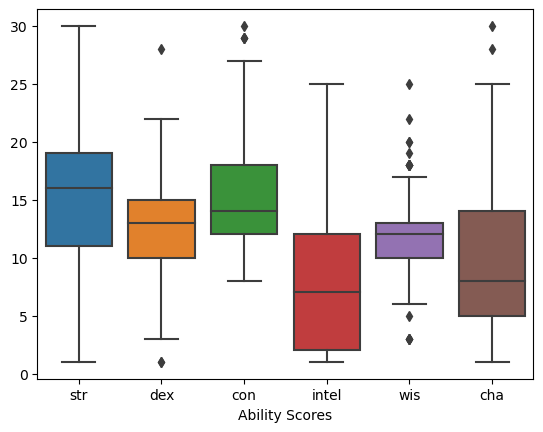

In [7]:
#Looking at the Ability Scores for Outliers
ability_scores = pd.DataFrame({
    'str' : monsters_df['strength'], 
     'dex' : monsters_df['dex'], 
     'con' : monsters_df['con'], 
     'intel' : monsters_df['intel'], 
     'wis' : monsters_df['wis'], 
     'cha' : monsters_df['cha']}
)
print(ability_scores.describe())

sns.boxplot(data = ability_scores).set(xlabel='Ability Scores')


**OBSERVATIONS**

Although there are a few points that lay outside the box plots, I do not consider these outliers because they belong to the more powerful monsters. Nothing is outside the range of 30, which is the max points a monster can have.

## Irregular data - Challenge Rating, Armor Class, and Hit Points

               cr          ac          hp
count  324.000000  324.000000  324.000000
mean     4.530478   14.043210   81.324074
std      5.864669    3.245094   99.182494
min      0.000000    5.000000    1.000000
25%      0.500000   12.000000   18.750000
50%      2.000000   13.000000   45.000000
75%      6.000000   17.000000  114.000000
max     30.000000   25.000000  676.000000


Text(0.5, 1.0, 'Challenge Rating')

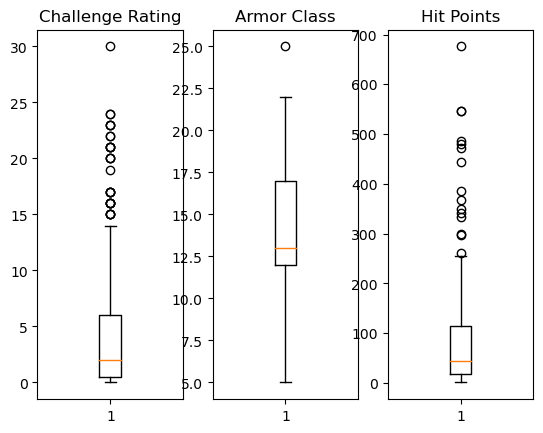

In [11]:
#Looking at Challenge Rating, Armor Class, and Hit Points to find Outliers


print(monsters_df[['cr', 'ac', 'hp']].describe())
armor_class = monsters_df['ac']
hit_points = monsters_df['hp']
challenge_rating = monsters_df['cr']


fig, axs = plt.subplots(1, 3)

axs[1].boxplot(armor_class)
axs[1].set_title('Armor Class')

axs[2].boxplot(hit_points)
axs[2].set_title('Hit Points')

axs[0].boxplot(challenge_rating)
axs[0].set_title('Challenge Rating')

In [48]:
#highest hit points are associated with legendary creatures (those that have legendary actions are legendary creatures)
high_hit_points = monsters_df.loc[monsters_df['number_legendary_actions'] > 0, 
                                  ('name', 'hp', 'ac', 'cr', 'number_legendary_actions')].sort_values('hp', ascending = False)

high_hit_points

,name,hp,ac,cr,number_legendary_actions
280,Tarrasque,676,25,30.0,3
18,Ancient Gold Dragon,546,22,24.0,3
20,Ancient Red Dragon,546,22,24.0,3
21,Ancient Silver Dragon,487,22,23.0,3
14,Ancient Blue Dragon,481,22,23.0,3
181,Kraken,472,18,23.0,3
16,Ancient Bronze Dragon,444,22,22.0,3
19,Ancient Green Dragon,385,21,22.0,3
13,Ancient Black Dragon,367,22,21.0,3
17,Ancient Copper Dragon,350,21,21.0,3


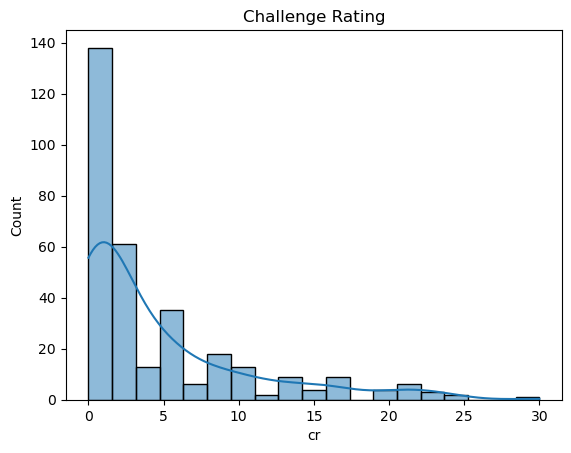

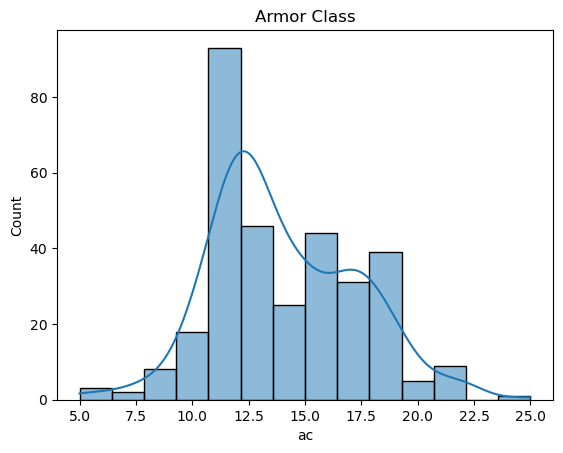

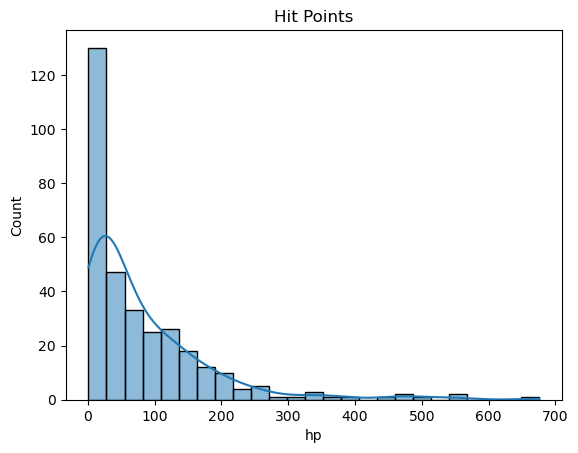

In [12]:
cr_hist = sns.histplot(x = 'cr', data = monsters_df, kde = True).set_title('Challenge Rating')
plt.show()
ac_hist = sns.histplot(x = 'ac', data = monsters_df, kde = True).set_title('Armor Class')
plt.show()
hp_hist = sns.histplot(x = 'hp', data = monsters_df, kde = True).set_title('Hit Points')
plt.show()

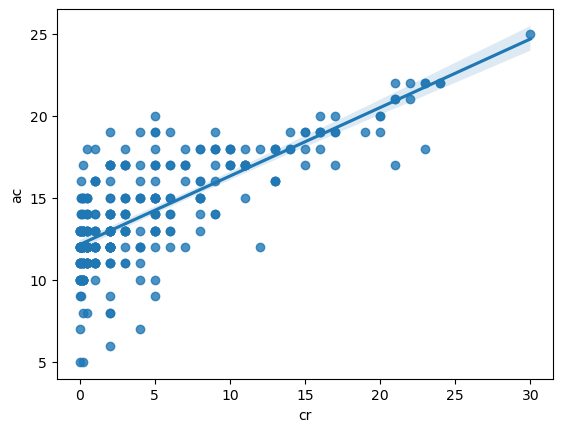

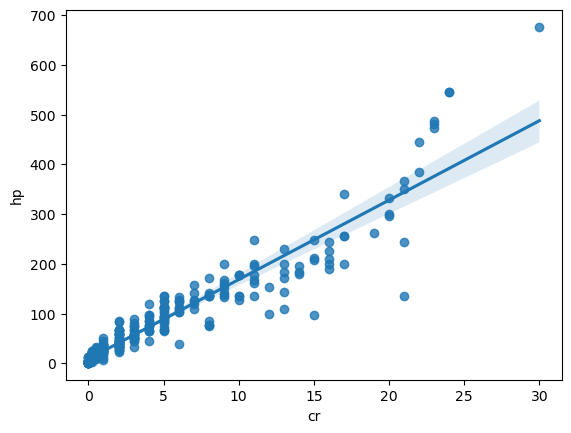

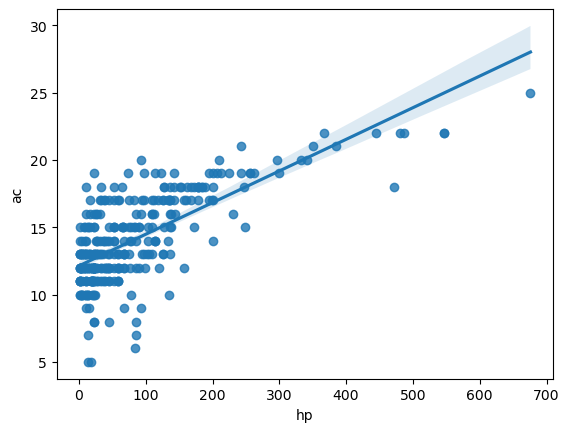

In [137]:
cr_ac = sns.regplot(x="cr", y="ac", data=monsters_df)
plt.show()

cr_hp = sns.regplot(x="cr", y="hp", data=monsters_df)
plt.show()

hp_ac = sns.regplot(x="hp", y="ac", data=monsters_df)
plt.show()

**OBSERVATIONS**

As expected, the bulk of the monsters have a challenge rating less than 5. There are far more level 0.5 monters than 20, which is good if you want to plan a campaign that won't immediately annihilate your players. Hit Points and Armor Class show a similar trend, with the bulk of the monsters having an ac score at around 12 and half the monsters below 45.

There also seems to be a slight positive correlation between all three as well, which makes sense.

There are a few outliers in the hit points section, but I will keep those in as those monsters correlate with legendary beasts, which have some of the highest hit points.

# Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [141]:
#languages, senses, maybe?

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
2. Did the process of cleaning your data give you new insights into your dataset?
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?